In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
fs = 18 # fontsize
plt.rcParams['axes.labelsize'] = fs
plt.rcParams['xtick.labelsize'] = fs
plt.rcParams['ytick.labelsize'] = fs

In [27]:
df_import = pd.read_excel('../data/nrg_ti_gas__custom_938385_page_spreadsheet.xlsx',sheet_name='Sheet 1',header=9,usecols=['TIME','2020'],dtype={'2020':'float64'})
df_consumption = pd.read_excel('../data/nrg_ti_gas_page_spreadsheet.xlsx',sheet_name='Sheet 1',header=9,usecols=['TIME','2020'],dtype={'2020':'float64'})

In [28]:
#df_import.set_index('TIME',inplace=True)
df_import.dropna(inplace=True)
df_import.drop(1,inplace=True)
df_import.rename(columns={'TIME':'country','2020':'imp'},inplace=True)

In [29]:
df_import.set_index('country',inplace=True)
df_import.rename({'Germany (until 1990 former territory of the FRG)':'Germany','Czechia':'Czech Republic'},inplace=True)

In [30]:
# Some countries, e.g. United Kingdom is not included in this database. UK is the 10th largest consumer globally... 
Europe = ['Albania', 'Austria',#'Bosnia Herzegovina', 
          'Belgium',
         'Bulgaria', #'Switzerland', 
         'Czech Republic', 
         'Germany', 'Denmark', 'Estonia', 'Spain', 
         'Finland', 'France', #'United Kingdom', 
          'Greece', 'Croatia', 
         'Hungary', 'Ireland', 'Italy', 'Lithuania', 'Luxembourg', 'Latvia', 
         'Montenegro', #'Macedonia', 
          'Netherlands', #'Norway', 
          'Poland', 
         'Portugal', 'Romania', #'Serbia', 
          'Sweden', 'Slovenia', 'Slovakia']

In [7]:
threshold = 20000

In [8]:
df_import_Europe = df_import.loc[Europe]
df_import_nonEurope = df_import.loc[~df_import.index.isin(Europe)]

idx_small_rows_imp_Europe = df_import_Europe.query("imp <= " + str(threshold)).index
idx_small_rows_imp_nonEurope = df_import_nonEurope.query("imp <= " + str(threshold)).index

s_Europe = df_import_Europe.loc[idx_small_rows_imp_Europe,'imp'].sum()
s_nonEurope = df_import_nonEurope.loc[idx_small_rows_imp_nonEurope,'imp'].sum()

df_import.drop(list(idx_small_rows_imp_Europe) + list(idx_small_rows_imp_nonEurope),inplace=True)

In [9]:
df_import

,imp
country,
Russia,152648.740
Norway,74562.741
Algeria,28997.230
Not specified,27431.302
Netherlands,22941.337


In [10]:
df_Europe = pd.DataFrame(s_Europe,columns=['imp'],index=['Other Europe'])
df_nonEurope = pd.DataFrame(s_nonEurope,columns=['imp'],index=['Other non-Europe'])
df_import = pd.concat([df_import,df_Europe,df_nonEurope])

In [11]:
df_import

,imp
Russia,152648.740
Norway,74562.741
Algeria,28997.230
Not specified,27431.302
Netherlands,22941.337
Other Europe,24300.398
Other non-Europe,69707.612


In [12]:
import_relative = df_import/df_import.sum()*100

In [13]:
import_relative

,imp
Russia,38.106040
Norway,18.613260
Algeria,7.238642
Not specified,6.847736
Netherlands,5.726896
Other Europe,6.066162
Other non-Europe,17.401264


In [14]:
# import_relative.to_csv('../data/Import_percentages.csv')

In [15]:
df_consumption.dropna(inplace=True)
df_consumption.drop([1,3],inplace=True)
df_consumption.rename(columns={'TIME':'country','2020':'consumption'},inplace=True)

In [16]:
df_consumption.set_index('country',inplace=True)
df_consumption.rename({'Czechia':'Czech Republic'},inplace=True)

In [17]:
df_cons_Europe = df_consumption.loc[Europe]

In [18]:
df_cons_nonEurope = df_consumption.loc[~df_consumption.index.isin(Europe)]

In [19]:
#idx_small_rows_cons = df_consumption.query("consumption <= 20000").index
#s = df_consumption.loc[idx_small_rows_cons,'consumption'].sum()
#df_consumption.drop(idx_small_rows_cons,inplace=True)
#df_consumption= df_consumption.append({'country':'Other','consumption':s},ignore_index=True)

idx_small_rows_cons_Europe = df_cons_Europe.query("consumption <= " + str(threshold)).index
idx_small_rows_cons_nonEurope = df_cons_nonEurope.query("consumption <= " + str(threshold)).index

s_Europe = df_cons_Europe.loc[idx_small_rows_cons_Europe,'consumption'].sum()
s_nonEurope = df_cons_nonEurope.loc[idx_small_rows_cons_nonEurope,'consumption'].sum()

df_consumption.drop(list(idx_small_rows_cons_Europe) + list(idx_small_rows_cons_nonEurope),inplace=True)

In [20]:
df_Europe = pd.DataFrame(s_Europe,columns=['consumption'],index=['Other Europe'])
df_nonEurope = pd.DataFrame(s_nonEurope,columns=['consumption'],index=['Other non-Europe'])
df_consumption = pd.concat([df_consumption,df_Europe,df_nonEurope])

In [21]:
# convert to bcm
df_import /= 1e3
df_consumption /= 1e3

In [22]:
df = pd.concat((df_consumption.T,df_import.T))
df['Type'] = ['Consumption','    Import / Production']

In [23]:
cols = ['Russia','Algeria','Other non-Europe','Not specified','Germany','Belgium','Spain','France','Italy','Norway','Netherlands','Other Europe','Type']
df[cols]

,Russia,Algeria,Other non-Europe,Not specified,Germany,Belgium,Spain,France,Italy,Norway,Netherlands,Other Europe,Type
consumption,NaN,NaN,0.364182,NaN,80.439019,21.6657,32.485,46.321129,66.39283,NaN,59.800178,93.121322,Consumption
imp,152.64874,28.99723,69.707612,27.431302,NaN,NaN,NaN,NaN,NaN,74.562741,22.941337,24.300398,Import / Production


In [24]:
cp = plt.rcParams['axes.prop_cycle'].by_key()['color']

cp = cp + ['#a924b7','#2CBDFE','#3aacf6', '#489bee','#568ae6',
           '#6379de', '#7168d7','#7f57cf', '#8d46c7','#9b35bf']

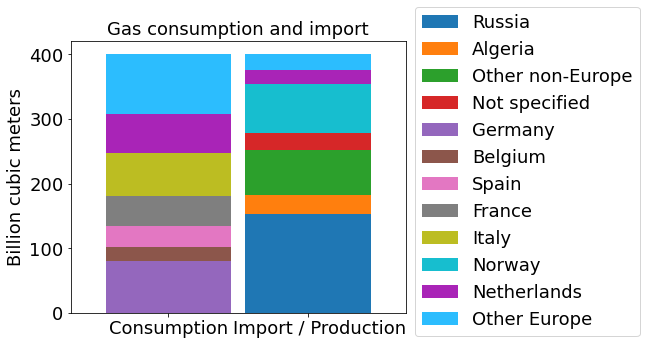

In [25]:
fig,ax = plt.subplots(figsize=(6,5))
df[cols].plot(kind='bar',stacked=True,x='Type',ax=ax,width=0.9,color=cp)
lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.52),prop={'size':fs})
plt.title('Gas consumption and import',fontsize=fs)
plt.ylabel('Billion cubic meters')
plt.xlabel('')
plt.xticks(rotation = 0) # Rotates X-Axis Ticks by 45-degrees
plt.savefig('gas_overview.jpeg',dpi=500,bbox_extra_artists=(lgd,),bbox_inches='tight')

In [26]:
#df_import['2020'].values